In [1]:
import pandas as pd

df = pd.read_parquet('./../data/dataset_site_info.parquet')
df.head(None)


,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier
0,/JetHT/Run2016B-23Sep2016-v1/MINIAOD,934228,20200306,T1_RU_JINR_Disk,2.235519e+11,2020-03-07,2020-12-31,42.0,MINIAOD
1,/QCD_Pt_120to170_TuneCP5_13TeV_pythia8/RunIISu...,1566016,20200701,T2_IN_TIFR,5.754734e+11,2020-07-02,2020-12-31,42.0,MINIAODSIM
2,/EGamma/Run2018A-EcalUncalZElectron-12Nov2019_...,1466140,20200925,T2_IN_TIFR,1.779573e+12,2020-10-03,2020-12-31,42.0,ALCARECO
3,/QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madg...,1495975,20200114,T1_US_FNAL_Disk,1.753403e+11,2020-01-18,2020-12-31,42.0,MINIAODSIM
4,/QCD_Pt_50to80_TuneCUETP8M1_13TeV_pythia8/RunI...,1064309,20170911,T2_CH_CERN,1.026091e+12,2019-01-01,2020-12-31,102.0,ALCARECO
...,...,...,...,...,...,...,...,...,...
6752625,/WZTo3LNu_mllmin01_NNPDF31_TuneCP5_13TeV_powhe...,1258355,20190116,T2_UK_SGrid_RALPP,3.800483e+09,2019-01-16,2019-01-16,NaN,AODSIM
6752626,/SMS-T1qqqq_mGluino-1400_mLSP-100_TuneCUETP8M1...,1106198,20190212,T2_EE_Estonia,5.924122e+10,2019-02-13,2019-02-14,42.0,GEN-SIM
6752627,/HIDoubleMuon/HIRun2018A-04Apr2019-v1/DQMIO,1318323,20190418,T1_DE_KIT_Disk,1.941605e+07,2019-04-18,2019-04-18,NaN,DQMIO
6752628,/SMS-T5qqqqHg_refPoints_TuneCP2_13TeV-madgraph...,1511968,20200322,T1_IT_CNAF_Disk,7.544165e+08,2020-06-11,2020-06-11,NaN,MINIAODSIM


In [2]:
from cmSim.container import DataContainer

datatiers = ['RAW', 'RECO',  # real data (low-level)
             'AOD', 'MINIAOD',  # real data (high-level)
             'AODSIM', 'MINIAODSIM']  # simulated data

container = DataContainer.from_dataframe(df)


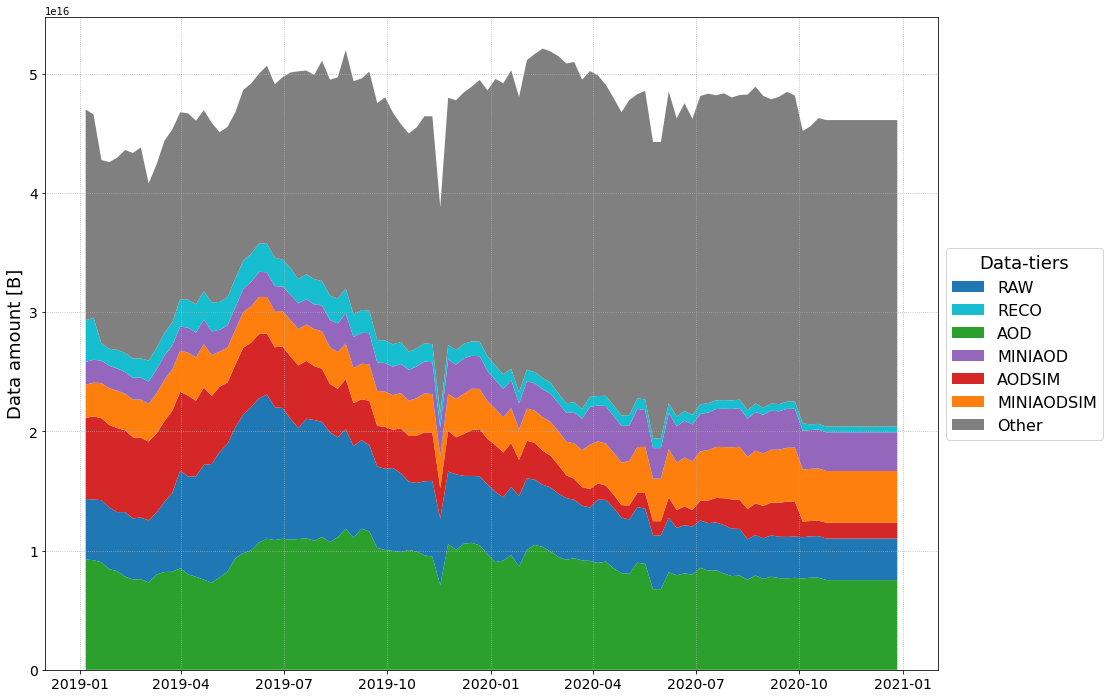

In [3]:
import pylab as plt

fig, ax = plt.subplots(figsize=(16, 12))

container.plot_storage_history_by_datatier(
    ax, datatiers=datatiers, tier='T1', norm=False, freq='W')


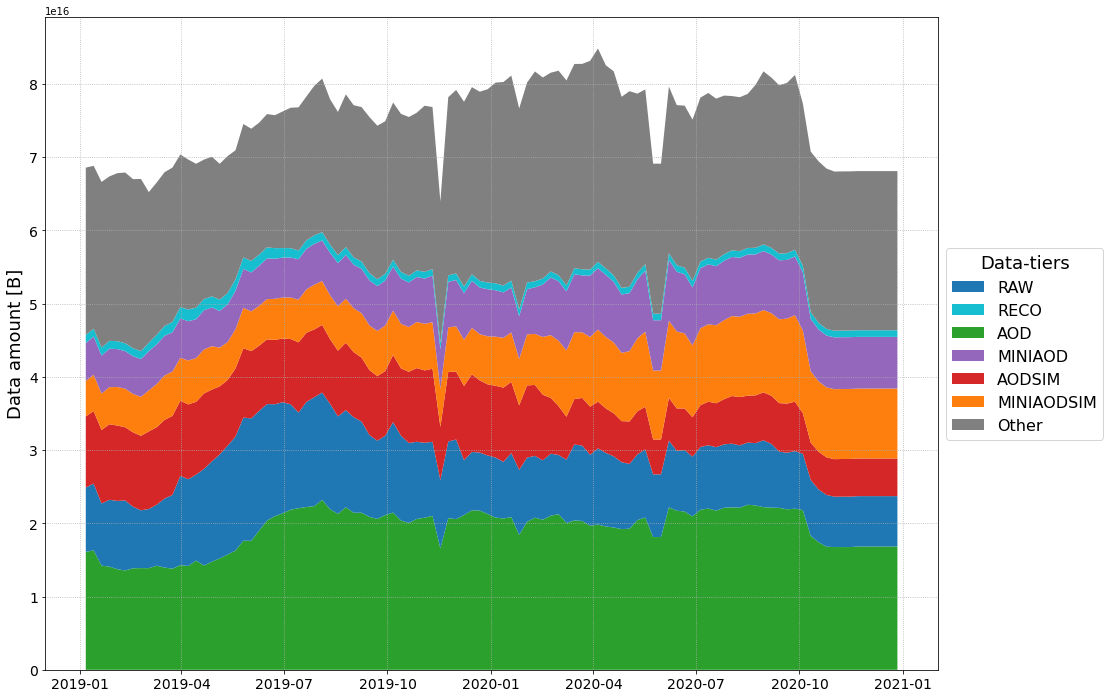

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))

container.plot_storage_history_by_datatier(
    ax, datatiers=datatiers, tier='T2', norm=False, freq='W')
